# Advanced Pairs Trading : Kalman Filters

## Import library

In [1]:
import sys
sys.path.append('../../')

In [2]:
from util.load_data import *
from config.constants import *
import statsmodels.api as sm
import quantstats as qs
import numpy as np
from pykalman import KalmanFilter
import pandas as pd
import matplotlib.pyplot as plt
from Kalman_Filter import Kalman_Filter
from util.Save_result_return import save_to_csv

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None

## Getting the Data

In [4]:
XAUUSD = load_data()

In [ ]:
benchmark = {}

In [ ]:
benchmark['D1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
benchmark['H4'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
benchmark['H1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
benchmark['M30'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

## Class Kalman Filter

## Currency_Pair

In [5]:
Currency_Pair = 'BRENTCMDUSD'

## TF D1

In [6]:
TF = 'D1'

In [7]:
data_1 = XAUUSD[TF]

In [8]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

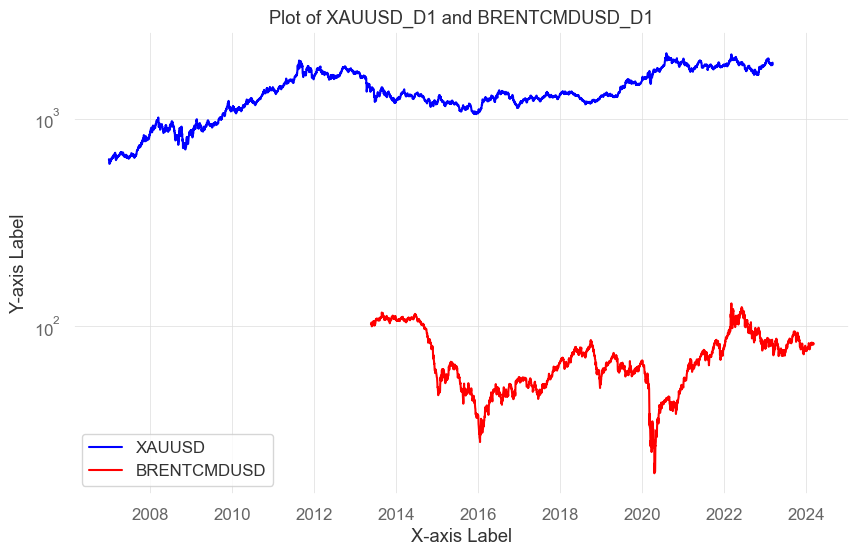

In [9]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [10]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],
                   data_2.loc['2007-03-05':'2023-03-01'])

In [11]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                          1.954e+04
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        03:52:51   Log-Likelihood:                         -19227.
No. Observations:                2522   AIC:                                  3.846e+04
Df Residuals:                    2521   BIC:                                  3.846e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         18.7778      0.134    139.774      0.000      18.514      19.041
==============================================================================
Omnibus:                        6.301   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.323
Skew:                          -0.122   Prob(JB):                       0.0424
Kurtosis:                       2.988   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
result = KF.Run(currency='BRENTCMDUSD')

In [13]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.970315
Multiple (Buy-and-Hold):     1.464426
--------------------------------------
Out-/Underperformance:       -0.494111


CAGR:                        -0.003079
Annualized Mean:             -0.003084
Annualized Std:              0.031247
Sharpe Ratio:                -0.098696
Sortino Ratio:               -0.139594
Maximum Drawdown:            0.097816
Calmar Ratio:                -0.031479
Max Drawdown Duration:       2418 Days
Kelly Criterion:             -2.65838


### Save Result Backtest 

In [14]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [15]:
filename = f'{Currency_Pair}_{TF}.csv'

In [16]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2013-05-24
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -3.43%
CAGR﹪                     -0.25%

Sharpe                     -0.1
Prob. Sharpe Ratio         37.89%
Smart Sharpe               -0.1
Sortino                    -0.14
Smart Sortino              -0.14
Sortino/√2                 -0.1
Smart Sortino/√2           -0.1
Omega                      0.98

Max Drawdown               -9.91%
Longest DD Days            2417
Volatility (ann.)          3.09%
Calmar                     -0.02
Skew                       0.07
Kurtosis                   3.43

Expected Daily %           -0.0%
Expected Monthly %         -0.03%
Expected Yearly %          -0.32%
Kelly Criterion            -0.84%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.32%
Expected Shortfall (cVaR)  -0.32%

Max Consecutive Wins 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-08-07,2022-06-13,2023-03-01,937,-9.914904,-9.535997
2,2013-12-24,2016-08-02,2020-08-05,2417,-8.387000,-7.866906
3,2013-07-08,2013-08-26,2013-11-20,136,-1.456708,-1.380488
4,2013-12-04,2013-12-10,2013-12-18,15,-0.667683,-0.592113
5,2013-05-29,2013-05-30,2013-06-06,9,-0.560711,-0.539294


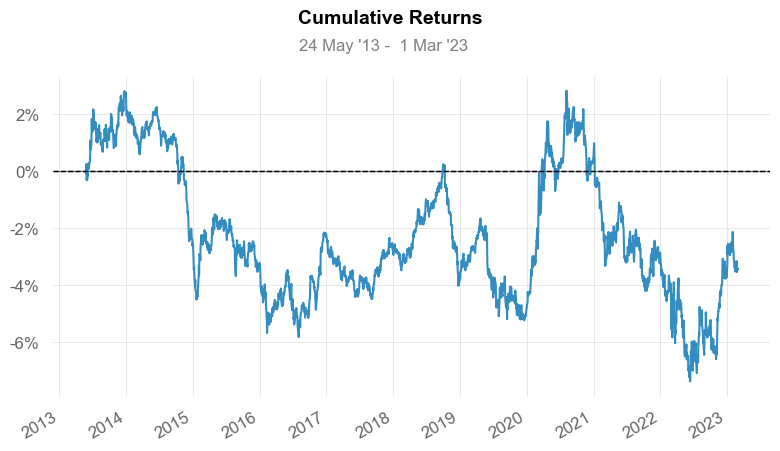

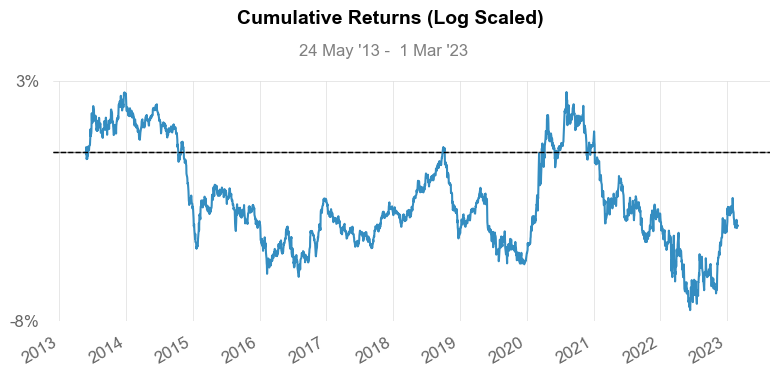

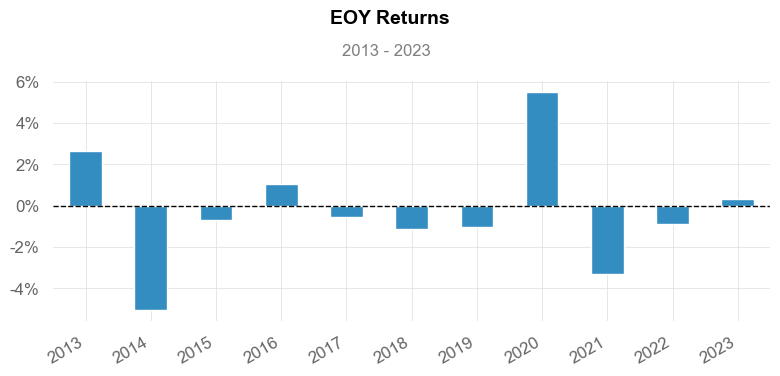

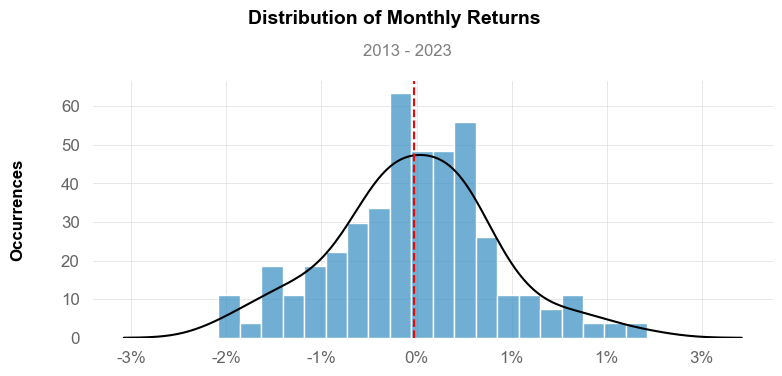

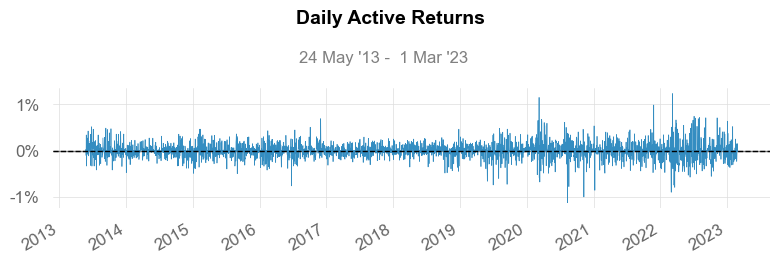

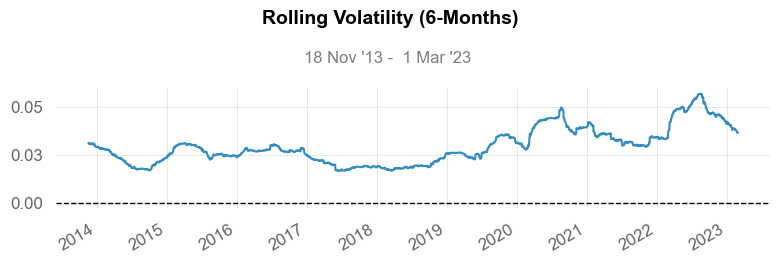

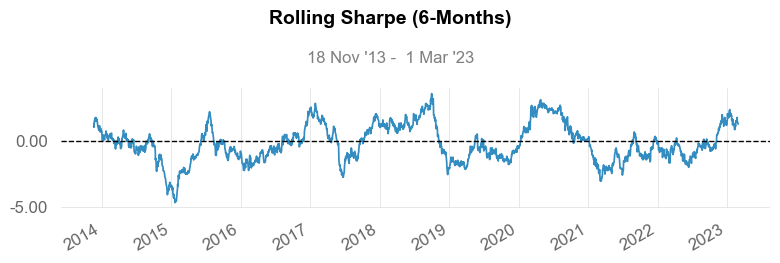

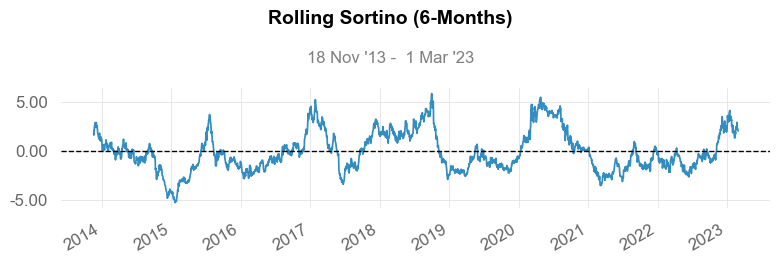

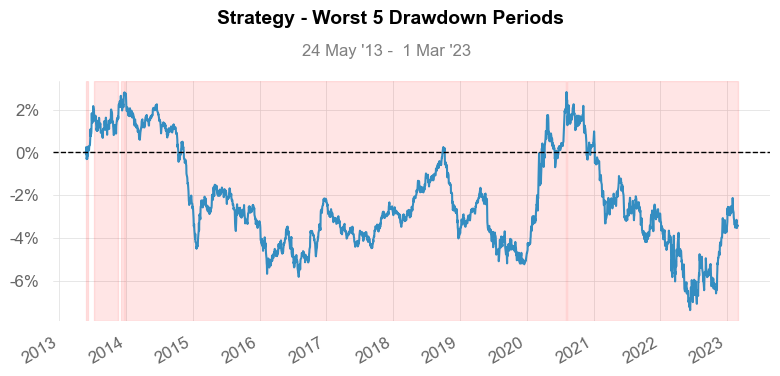

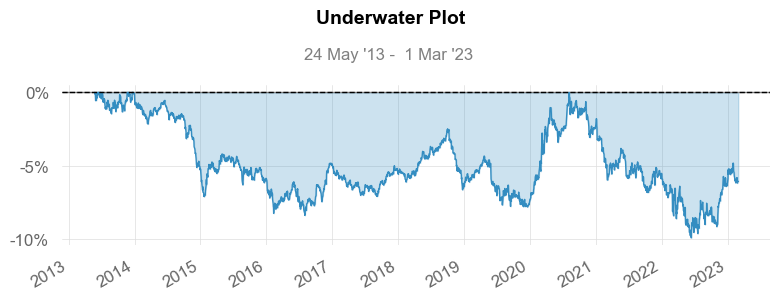

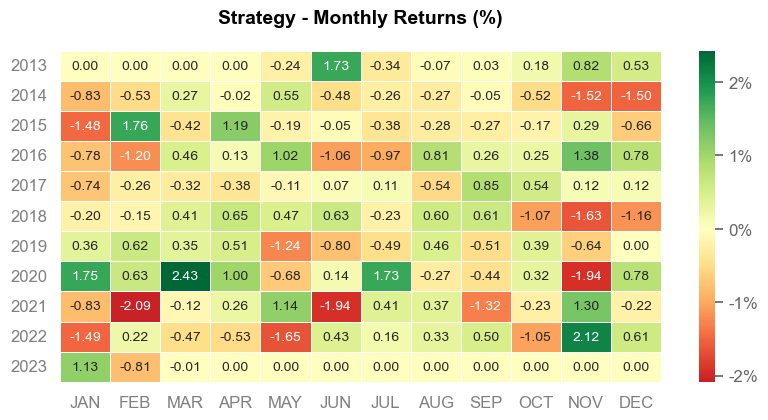

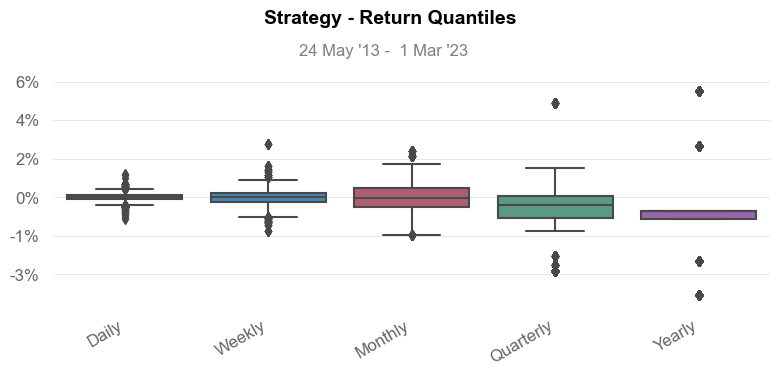

In [17]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H4

In [18]:
TF = 'H4'

In [19]:
data_1 = XAUUSD[TF]

In [20]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

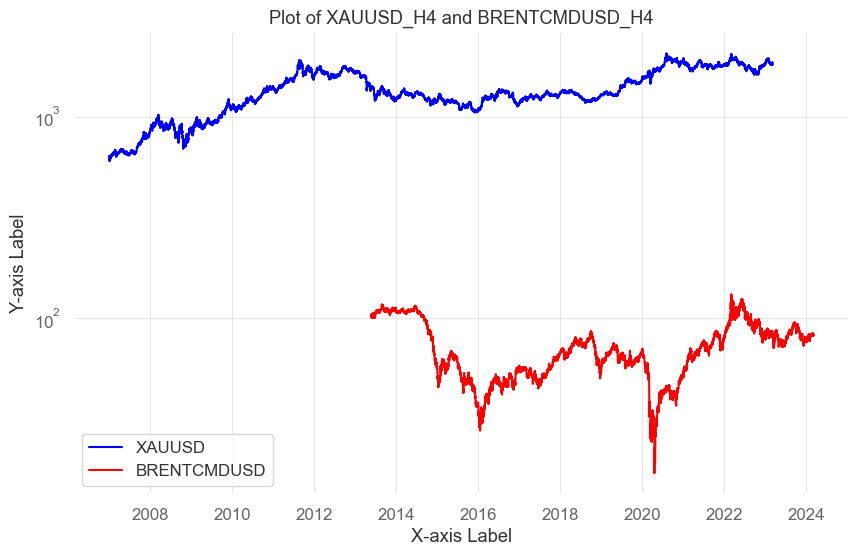

In [21]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [22]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],
                   data_2.loc['2007-03-05':'2023-03-01'])

In [23]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                          1.163e+05
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        03:53:14   Log-Likelihood:                     -1.1366e+05
No. Observations:               14912   AIC:                                  2.273e+05
Df Residuals:                   14911   BIC:                                  2.273e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         18.8411      0.055    341.012      0.000      18.733      18.949
==============================================================================
Omnibus:                       33.987   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.174
Skew:                          -0.117   Prob(JB):                     3.80e-08
Kurtosis:                       3.007   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
result = KF.Run(currency='BRENTCMDUSD')

In [25]:
KF.print_performance()

----------------------------------------------------------------------------------------------------
PERFORMANCE MEASURES:


Multiple (Strategy):         0.967603
Multiple (Buy-and-Hold):     1.479987
--------------------------------------
Out-/Underperformance:       -0.512384


CAGR:                        -0.003365
Annualized Mean:             -0.00337
Annualized Std:              0.03176
Sharpe Ratio:                -0.106119
Sortino Ratio:               -0.150447
Maximum Drawdown:            0.101311
Calmar Ratio:                -0.033212
Max Drawdown Duration:       3348 Days
Kelly Criterion:             -2.84082


### Save Result Backtest 

In [26]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [27]:
filename = f'{Currency_Pair}_{TF}.csv'

In [28]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2013-05-24
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -3.71%
CAGR﹪                     -0.27%

Sharpe                     -0.11
Prob. Sharpe Ratio         36.82%
Smart Sharpe               -0.11
Sortino                    -0.15
Smart Sortino              -0.15
Sortino/√2                 -0.11
Smart Sortino/√2           -0.11
Omega                      0.98

Max Drawdown               -10.18%
Longest DD Days            3355
Volatility (ann.)          3.1%
Calmar                     -0.03
Skew                       0.07
Kurtosis                   3.5

Expected Daily %           -0.0%
Expected Monthly %         -0.03%
Expected Yearly %          -0.34%
Kelly Criterion            -0.92%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.32%
Expected Shortfall (cVaR)  -0.32%

Max Consecutive Wi

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2013-12-24,2022-06-13,2023-03-01,3355,-10.178113,-9.415509
2,2013-07-08,2013-08-23,2013-11-20,136,-1.380498,-1.361509
3,2013-12-05,2013-12-10,2013-12-19,15,-0.758831,-0.683330
4,2013-05-29,2013-05-30,2013-06-06,9,-0.560714,-0.539298
5,2013-06-28,2013-07-01,2013-07-04,7,-0.434493,-0.338069


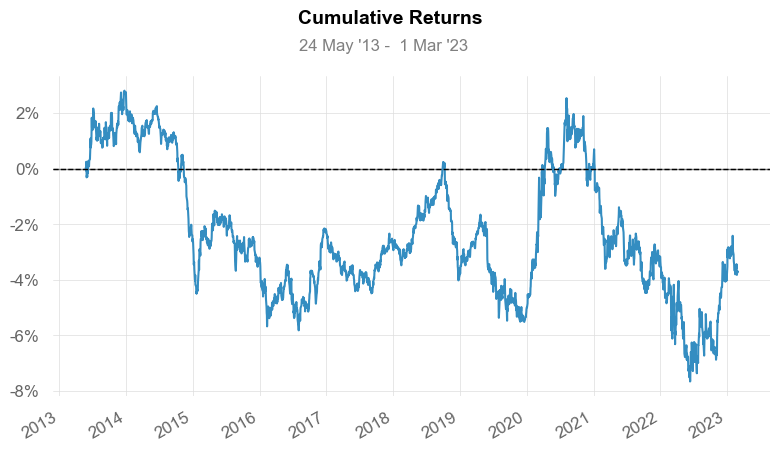

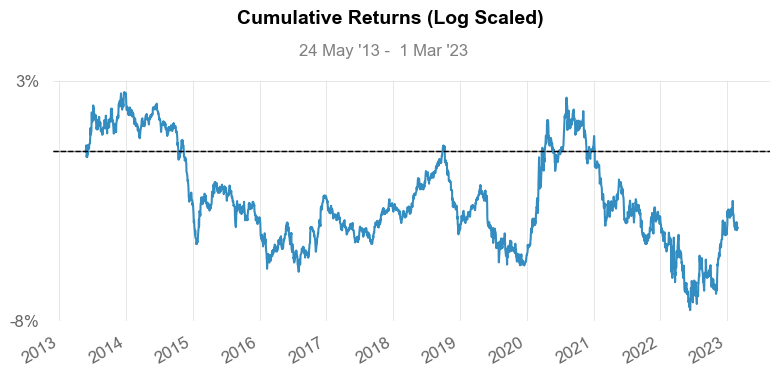

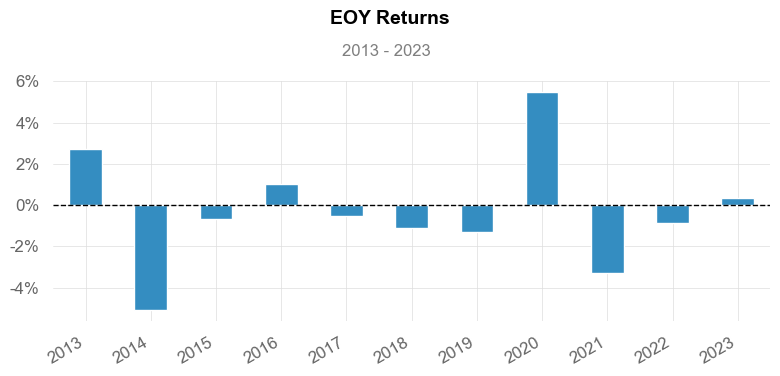

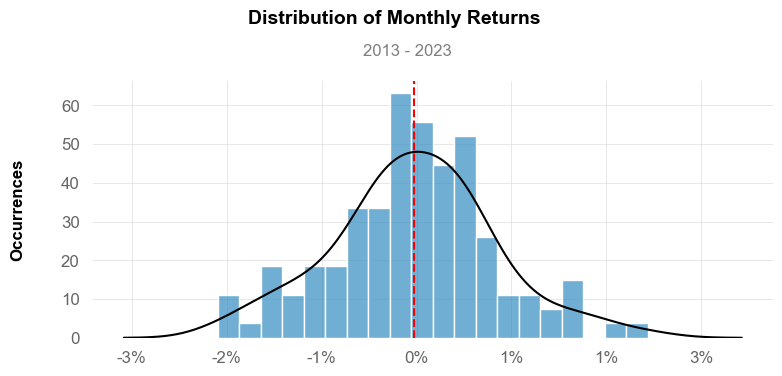

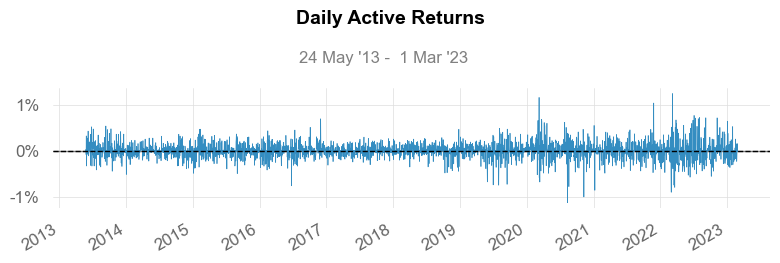

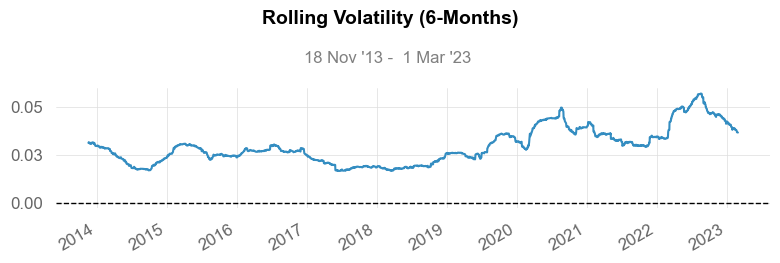

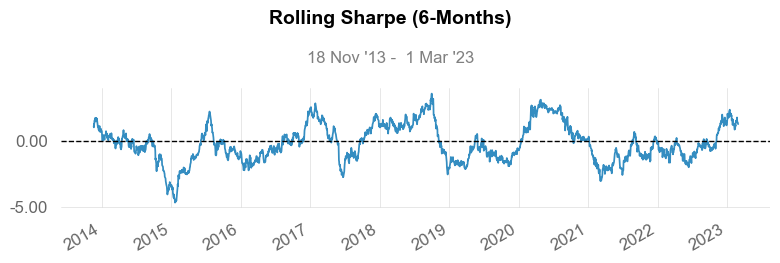

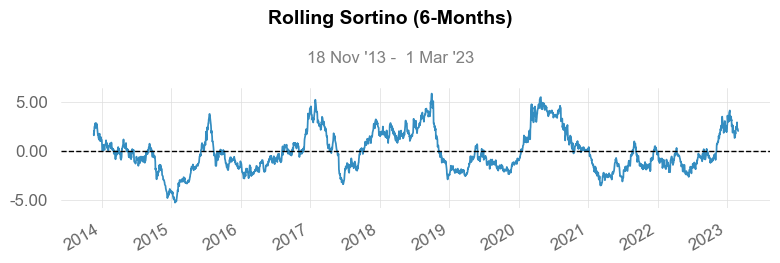

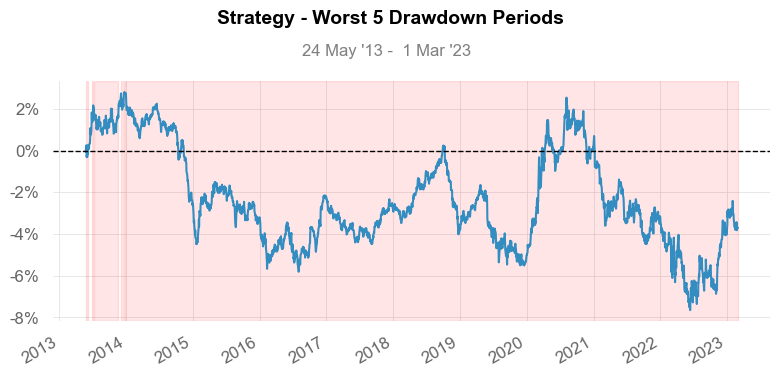

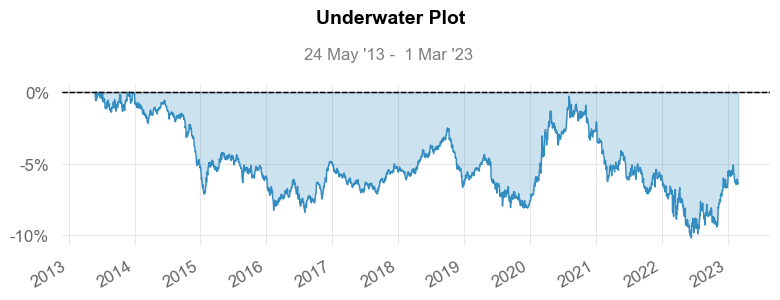

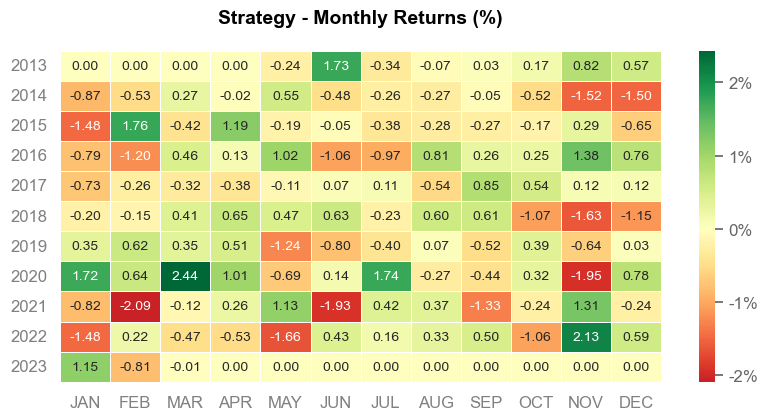

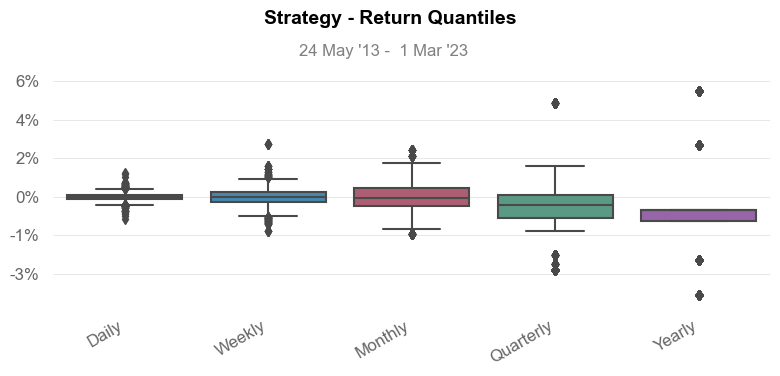

In [29]:
qs.reports.full(result['Equity'].resample('D').last().dropna().pct_change())

## TF H1

In [30]:
TF = 'H1'

In [31]:
data_1 = XAUUSD[TF]

In [32]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

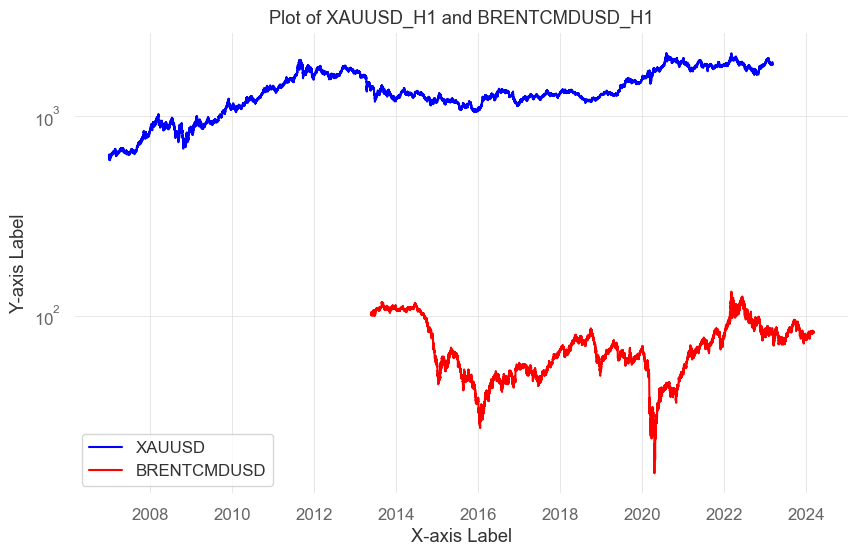

In [33]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [34]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],
                   data_2.loc['2007-03-05':'2023-03-01'])

In [35]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          4.128e+05
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        03:54:21   Log-Likelihood:                     -4.0218e+05
No. Observations:               52787   AIC:                                  8.044e+05
Df Residuals:                   52786   BIC:                                  8.044e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         18.8360      0.029    642.503      0.000      18.779      18.893
==============================================================================
Omnibus:                      122.200   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.991
Skew:                          -0.118   Prob(JB):                     1.96e-27
Kurtosis:                       3.017   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
result = KF.Run(currency='BRENTCMDUSD')

### Save Result Backtest 

In [37]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [38]:
filename = f'{Currency_Pair}_{TF}.csv'

In [39]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2013-05-24
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -3.74%
CAGR﹪                     -0.27%

Sharpe                     -0.11
Prob. Sharpe Ratio         36.77%
Smart Sharpe               -0.11
Sortino                    -0.15
Smart Sortino              -0.15
Sortino/√2                 -0.11
Smart Sortino/√2           -0.11
Omega                      0.98

Max Drawdown               -10.24%
Longest DD Days            3355
Volatility (ann.)          3.11%
Calmar                     -0.03
Skew                       0.07
Kurtosis                   3.71

Expected Daily %           -0.0%
Expected Monthly %         -0.03%
Expected Yearly %          -0.35%
Kelly Criterion            -0.93%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.32%
Expected Shortfall (cVaR)  -0.32%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2013-12-24,2022-06-13,2023-03-01,3355,-10.237884,-9.443844
2,2013-07-08,2013-08-23,2013-11-20,136,-1.380498,-1.370690
3,2013-12-05,2013-12-10,2013-12-18,14,-0.748190,-0.643887
4,2013-05-29,2013-05-30,2013-06-06,9,-0.543118,-0.521312
5,2013-06-28,2013-07-01,2013-07-04,7,-0.479973,-0.388280


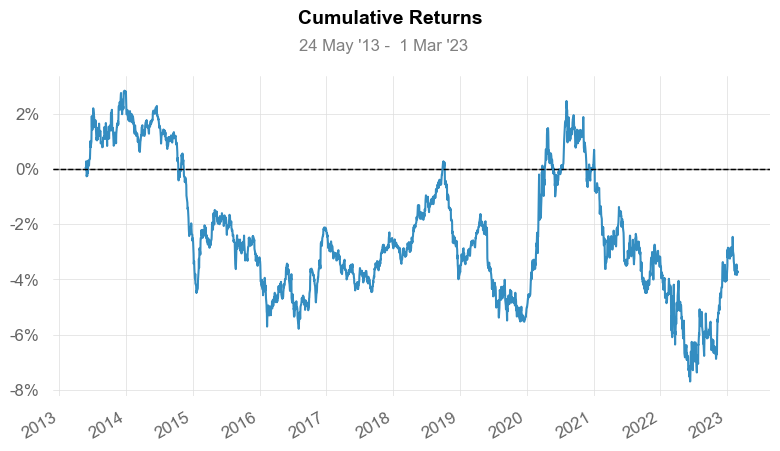

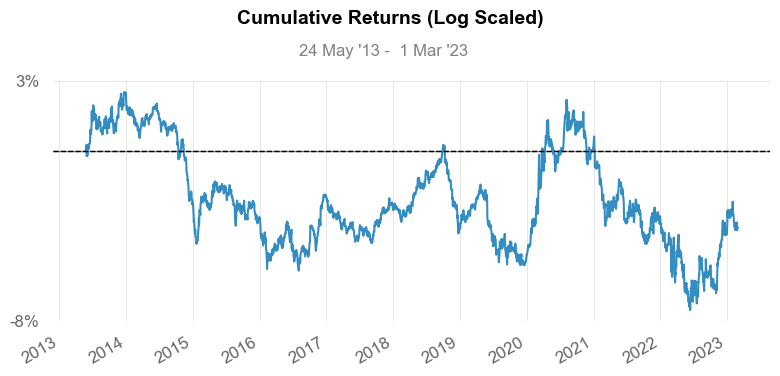

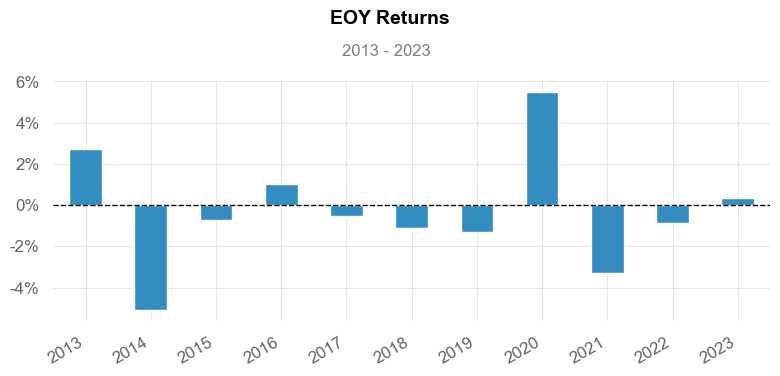

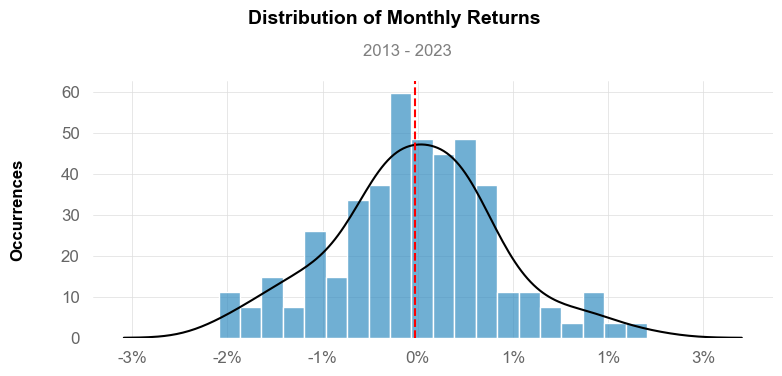

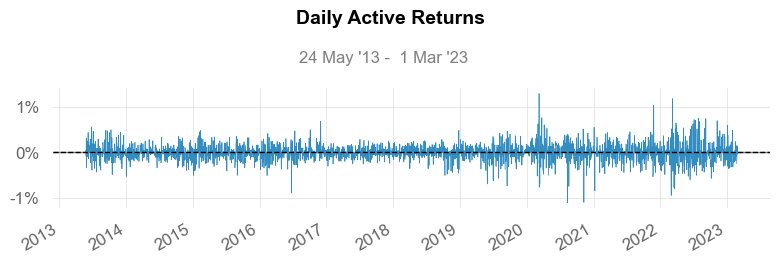

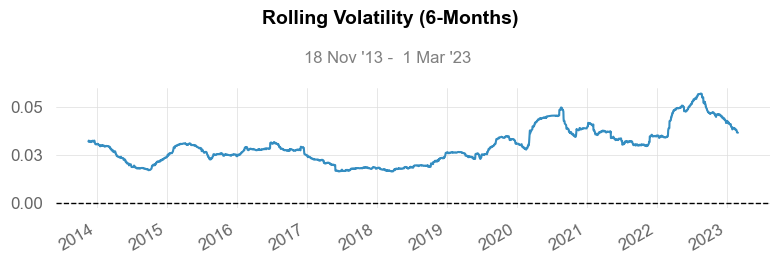

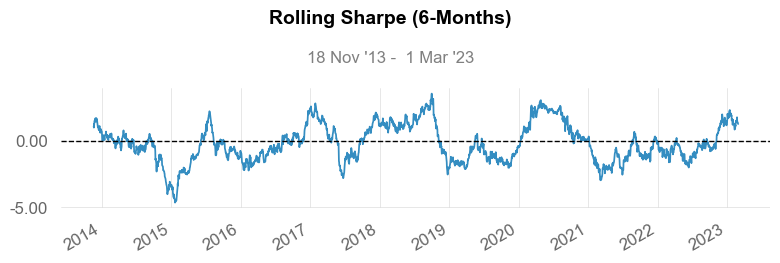

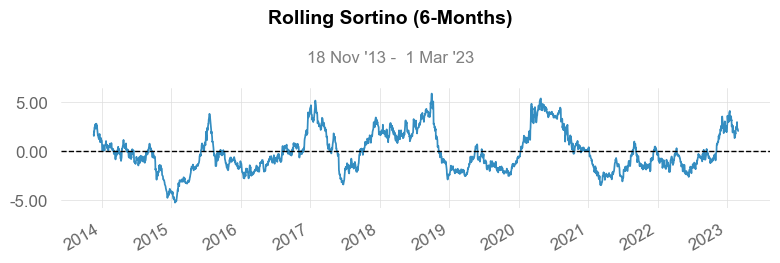

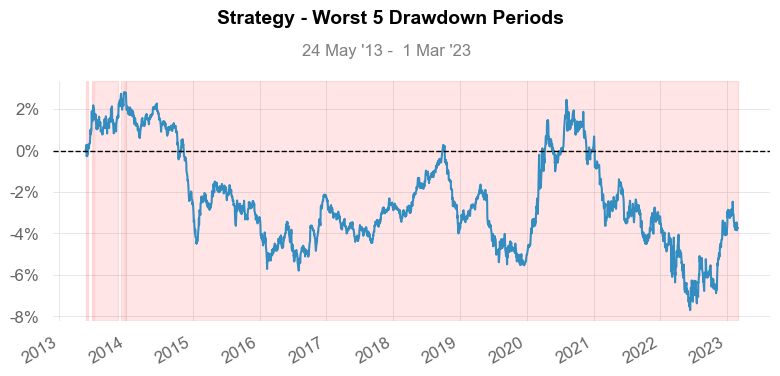

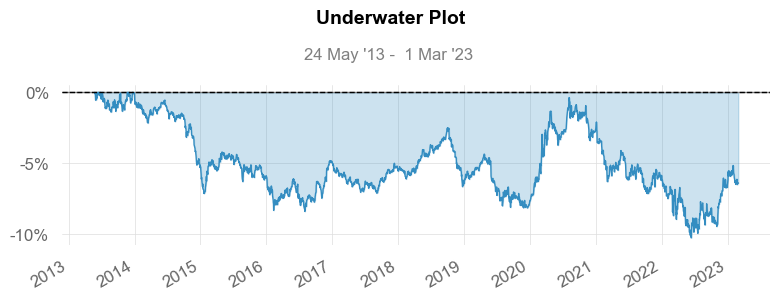

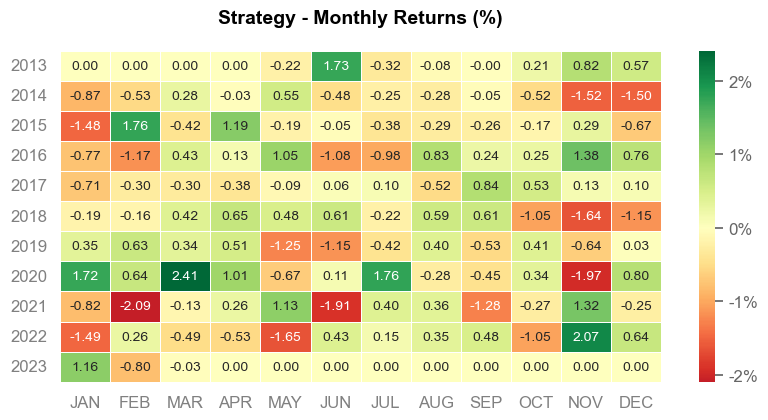

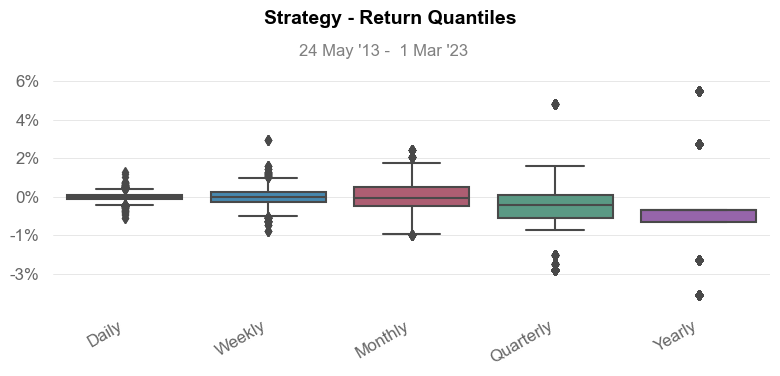

In [40]:
qs.reports.full(result['Equity'].resample('D').last(
).dropna().pct_change().resample('D').last().dropna())

## TF H30

In [41]:
TF = 'M30'

In [42]:
data_1 = XAUUSD[TF]

In [43]:
data_2 = pd.read_csv(
    PATH_DATA + f'/{Currency_Pair}/{Currency_Pair}_{TF} - {Currency_Pair}_{TF}' + '.csv', index_col='Time', parse_dates=True)

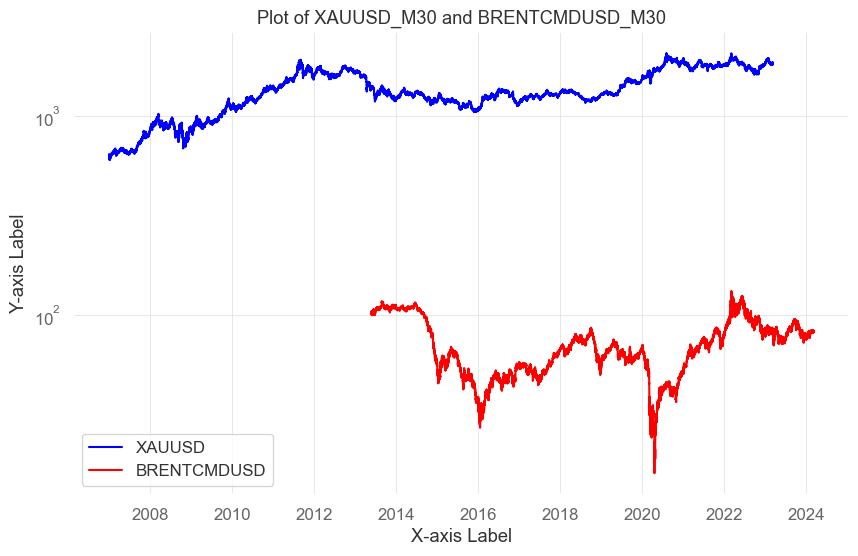

In [44]:
plt.figure(figsize=(10, 6))

# พล็อตข้อมูลใน data_1
plt.plot(data_1.index, data_1['Close'], label='XAUUSD', color='blue')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# พล็อตข้อมูลใน data_2
plt.plot(data_2.index, data_2['Close'], label=f'{Currency_Pair}', color='red')
plt.yscale('log')  # ใช้ค่าลอการิทึมในแกน y

# เพิ่มคำอธิบายแต่ละแท่งของกราฟ
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title(f'Plot of XAUUSD_{TF} and {Currency_Pair}_{TF}')
plt.legend()

# แสดงกราฟ
plt.show()

In [45]:
KF = Kalman_Filter(data_1.loc['2007-03-05':'2023-03-01'],
                   data_2.loc['2007-03-05':'2023-03-01'])

In [46]:
KF.Stat()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          8.248e+05
Date:                Mon, 11 Mar 2024   Prob (F-statistic):                        0.00
Time:                        03:57:59   Log-Likelihood:                     -8.0046e+05
No. Observations:              105075   AIC:                                  1.601e+06
Df Residuals:                  105074   BIC:                                  1.601e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         18.8682      0.021    908.160      0.000      18.827      18.909
==============================================================================
Omnibus:                      238.253   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.843
Skew:                          -0.116   Prob(JB):                     8.29e-53
Kurtosis:                       3.027   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
result = KF.Run(currency='BRENTCMDUSD')

### Save Result Backtest 

In [48]:
result
data = result[['Equity', 'Returns', 'stock1_signal', 'stock2_signal']].copy()

In [49]:
filename = f'{Currency_Pair}_{TF}.csv'

In [50]:
data.to_csv(
    f'../../out/Pairs_Trading/Kalman Filter/Backtest/{filename}', index=True)

### Reports

                           Strategy
-------------------------  ----------
Start Period               2013-05-24
End Period                 2023-03-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -3.33%
CAGR﹪                     -0.24%

Sharpe                     -0.09
Prob. Sharpe Ratio         38.34%
Smart Sharpe               -0.09
Sortino                    -0.13
Smart Sortino              -0.13
Sortino/√2                 -0.09
Smart Sortino/√2           -0.09
Omega                      0.98

Max Drawdown               -9.87%
Longest DD Days            2417
Volatility (ann.)          3.1%
Calmar                     -0.02
Skew                       0.07
Kurtosis                   3.7

Expected Daily %           -0.0%
Expected Monthly %         -0.03%
Expected Yearly %          -0.31%
Kelly Criterion            -0.82%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.32%
Expected Shortfall (cVaR)  -0.32%

Max Consecutive Win

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-08-07,2022-06-13,2023-03-01,937,-9.869237,-9.465391
2,2013-12-24,2016-08-02,2020-08-05,2417,-8.379453,-7.856833
3,2013-07-08,2013-08-23,2013-11-20,136,-1.380164,-1.370359
4,2013-12-05,2013-12-10,2013-12-18,14,-0.751777,-0.647503
5,2013-05-29,2013-05-30,2013-06-06,9,-0.542984,-0.521184


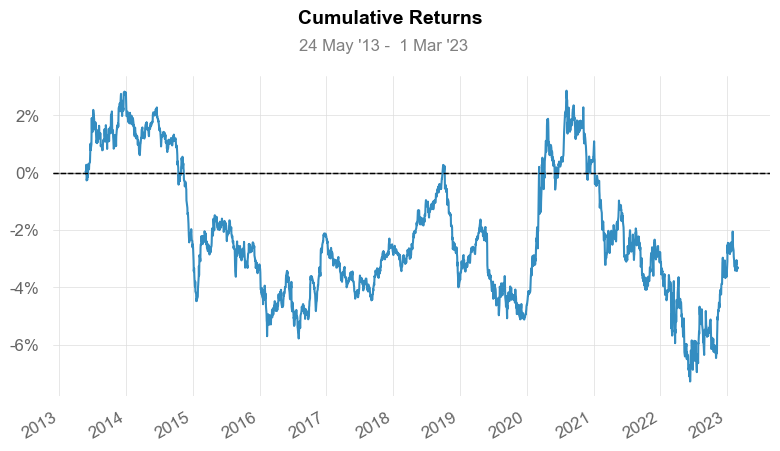

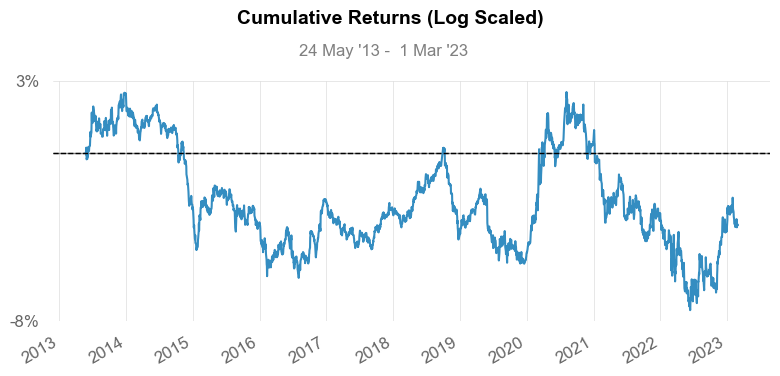

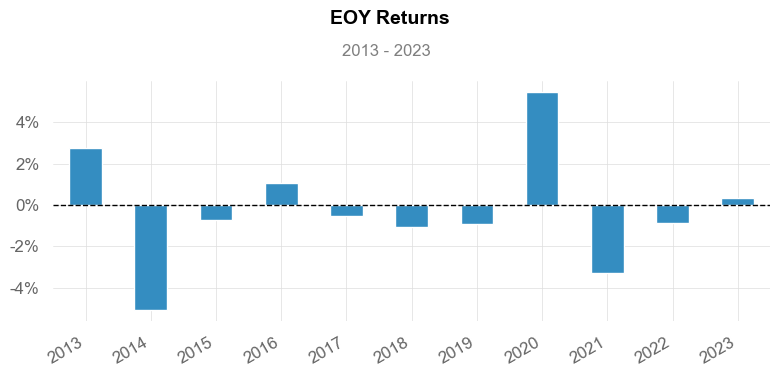

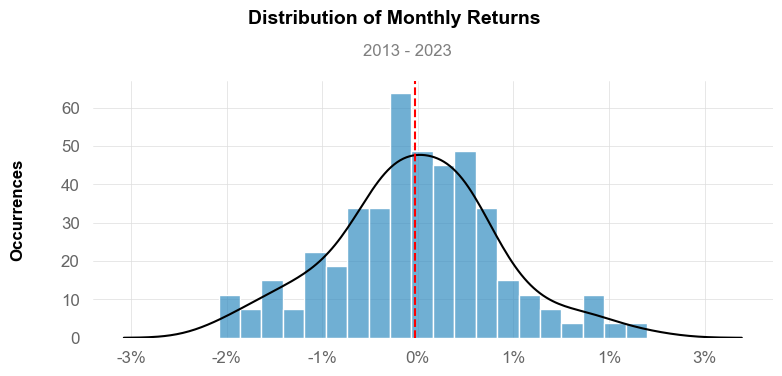

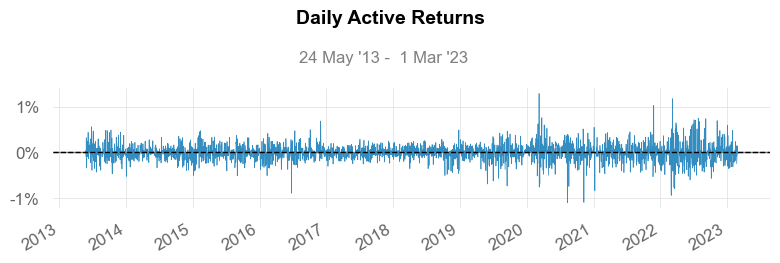

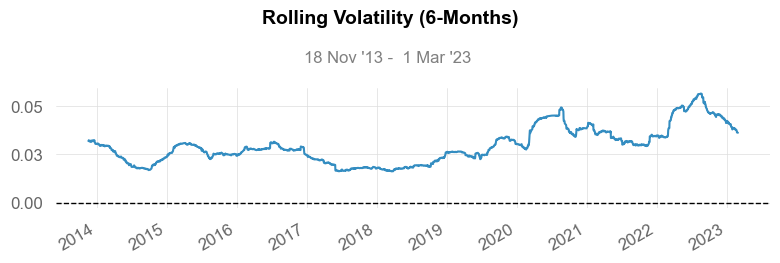

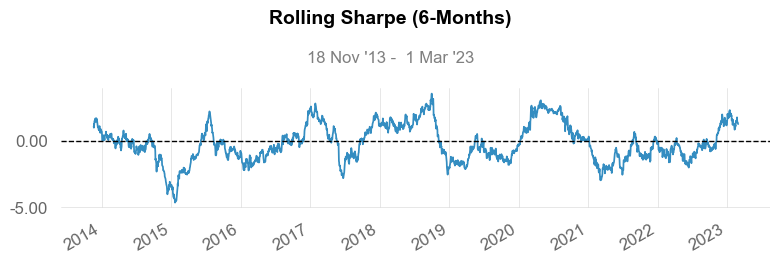

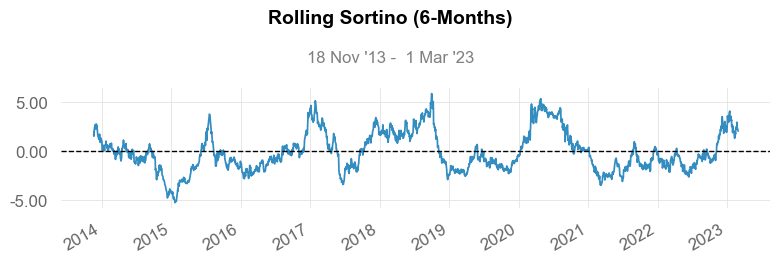

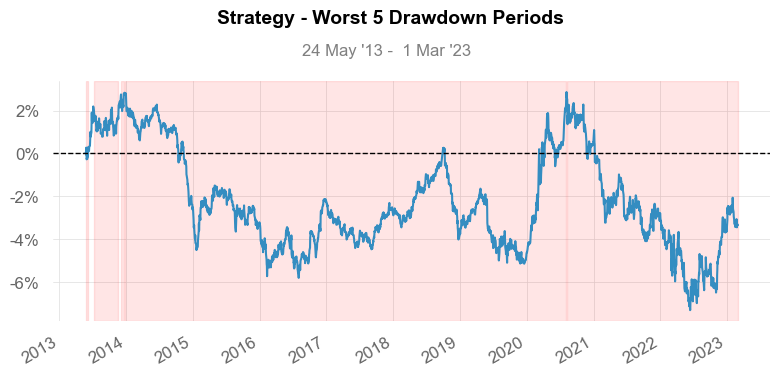

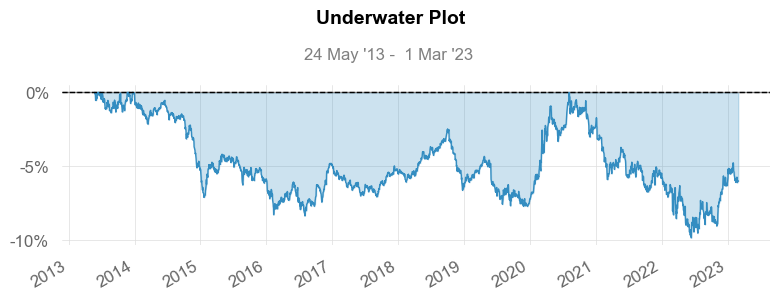

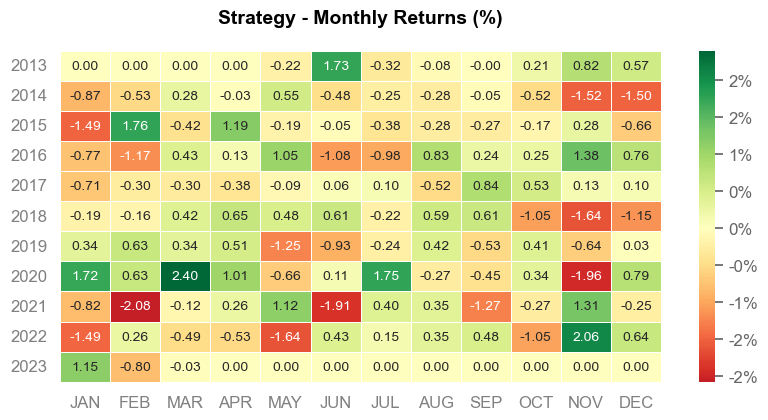

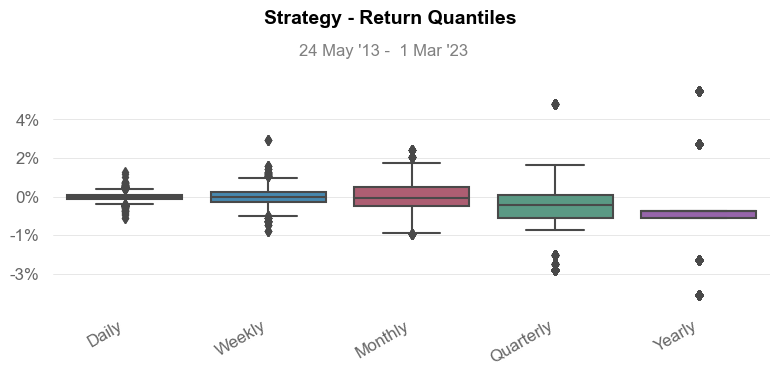

In [51]:
qs.reports.full(result['Equity'].resample('D').last(
).dropna().pct_change().resample('D').last().dropna())